<a href="https://colab.research.google.com/github/excel2001/system_programming_team_project/blob/main/202011035_%EA%B9%80%EB%AF%BC%EC%88%98_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

### 1. Generate the original signal from **0** to **3s** and Plot it

$x(t)=\cos(2\pi f_{0}t-\pi/12)+0.8\cos(4\pi f_{0}t-\pi/7)+0.8\cos(6\pi f_{0}t-\pi/30)+0.6\cos(8\pi f_{0}t-\pi/125)$, where $f_{0}$ is 2Hz


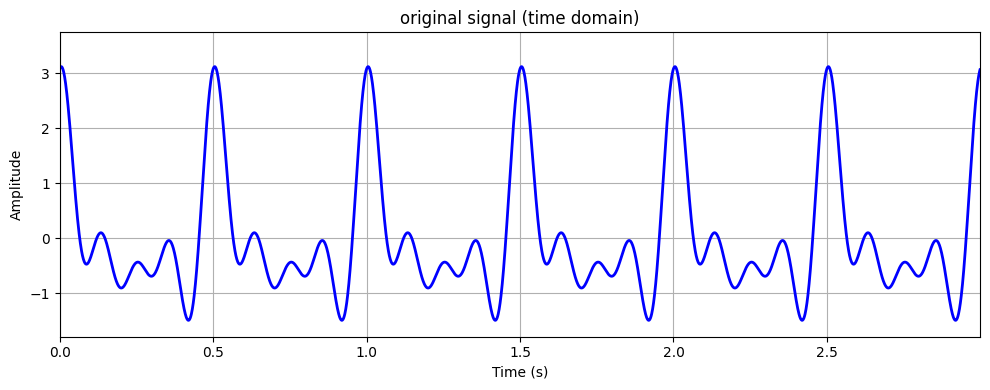

In [3]:
# x1: x(t)
# t1: t
"""
Write your code here
"""
f0 = 2
Fs = 1000
t1 = np.linspace(0, 3, int(3*Fs), endpoint = False)

x1 = (np.cos(2*np.pi*f0*t1 - np.pi/12) + 0.8*np.cos(4*np.pi*f0*t1 - np.pi/7) + 0.8*np.cos(6*np.pi*f0*t1 - np.pi/30) + 0.6*np.cos(8*np.pi*f0*t1 - np.pi/125))


plt.figure(figsize=(10, 4))
plt.plot(t1, x1, color='blue', linewidth=2.0, linestyle='-')
plt.xlim([0, t1[-1]])
plt.ylim([x1.min()*1.2, x1.max()*1.2])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('original signal (time domain)')
plt.grid()
plt.tight_layout()


### 2. Frequency domain plot (Using FFT)

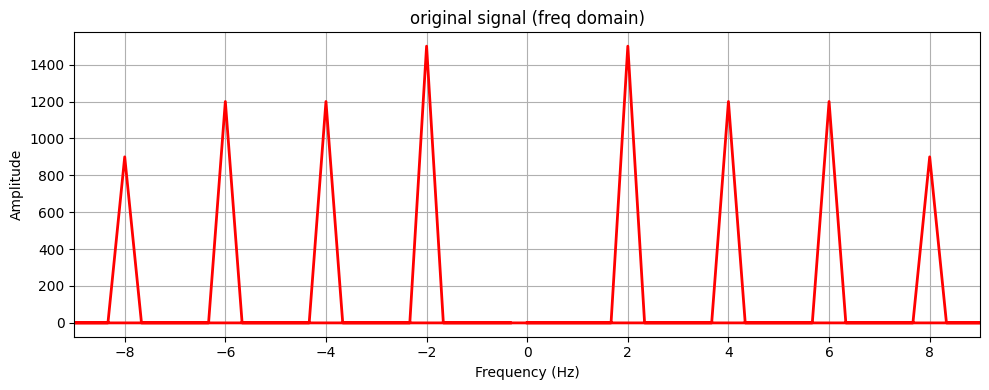

In [9]:
#x1_f: X(f)
#f1: f
"""
Write your code here
"""
x1_f = np.fft.fft(x1)
dt = 1/Fs
f1 = np.fft.fftfreq(len(x1), dt)

plt.figure(figsize=(10, 4))
plt.plot(f1, abs(x1_f), color='red', linewidth=2.0, linestyle='-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('original signal (freq domain)')
plt.xlim([-9, 9])
plt.grid()
plt.tight_layout()

### 3. Sample the signal with different sampling frequencies (f=8Hz, f=16Hz, f=24Hz)

In [5]:
# Define Sampling function across time with different frequencies
# Hint: One easy way to implement this is to use interpolation (np.interp) function
# Input: Signal to be sampled, Time dimension, Sampling frequency, duration=3s
# Output: Sampled signal, Time dimension of sampled signal
def sampling_time(x, t, Fs, dur=3):
    """
    Write your code here
    """
    t_out = np.arange(0, dur, 1/Fs)
    x_out = np.interp(t_out, t, x)
    return x_out, t_out


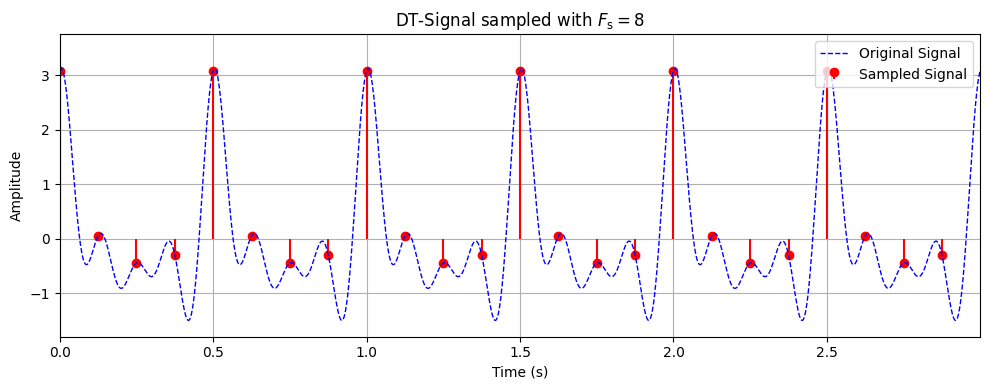

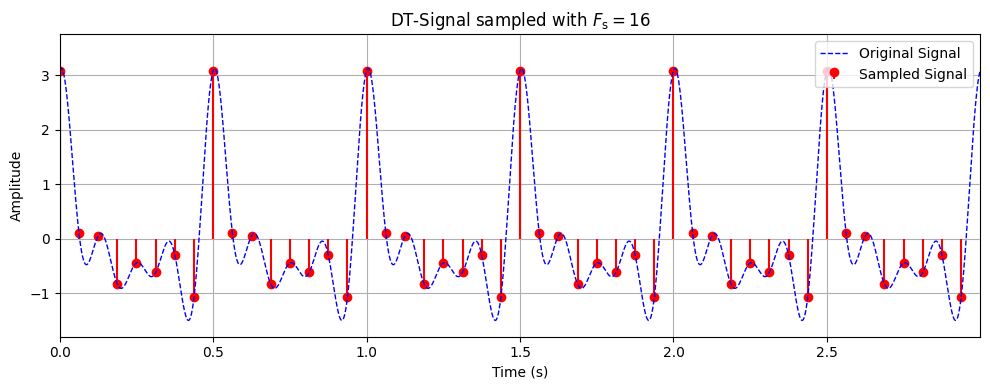

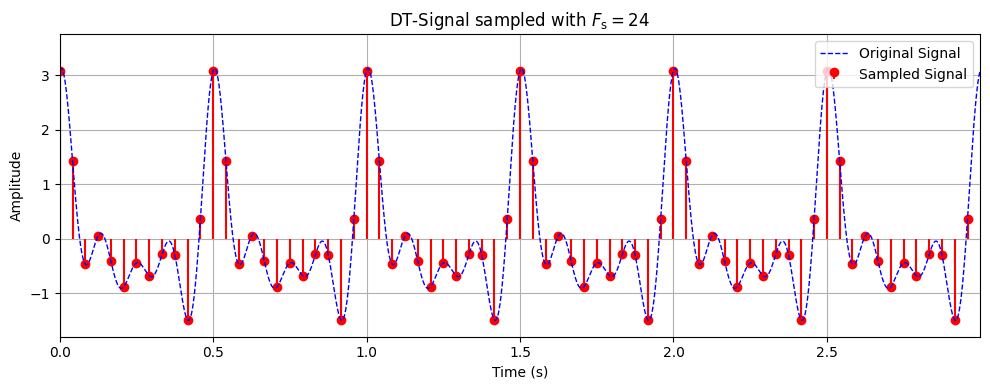

In [6]:
Fs_2 = 8
x2, t2 = sampling_time(x1, t1, Fs_2, dur=3)

Fs_3 = 16
x3, t3 = sampling_time(x1, t1, Fs_3, dur=3)

Fs_4 = 24
x4, t4 = sampling_time(x1, t1, Fs_4, dur=3)

plt.figure(figsize=(10, 4))
plt.stem(t2, x2, linefmt='r', markerfmt='ro', basefmt='None', label='Sampled Signal')
plt.plot(t1, x1, 'b', linewidth=1, linestyle='--', label='Original Signal')
plt.xlim([0, t1[-1]])
plt.ylim([x1.min()*1.2, x1.max()*1.2])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(r'DT-Signal sampled with $F_\mathrm{s} = %.0f$' % Fs_2)
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

plt.figure(figsize=(10, 4))
plt.stem(t3, x3, linefmt='r', markerfmt='ro', basefmt='None', label='Sampled Signal')
plt.plot(t1, x1, 'b', linewidth=1, linestyle='--', label='Original Signal')
plt.xlim([0, t1[-1]])
plt.ylim([x1.min()*1.2, x1.max()*1.2])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(r'DT-Signal sampled with $F_\mathrm{s} = %.0f$' % Fs_3)
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

plt.figure(figsize=(10, 4))
plt.stem(t4, x4, linefmt='r', markerfmt='ro', basefmt='None', label='Sampled Signal')
plt.plot(t1, x1, 'b', linewidth=1, linestyle='--', label='Original Signal')
plt.xlim([0, t1[-1]])
plt.ylim([x1.min()*1.2, x1.max()*1.2])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(r'DT-Signal sampled with $F_\mathrm{s} = %.0f$' % Fs_4)
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

### 4. Reconstruct the original signal from the sampled signals with sinc function

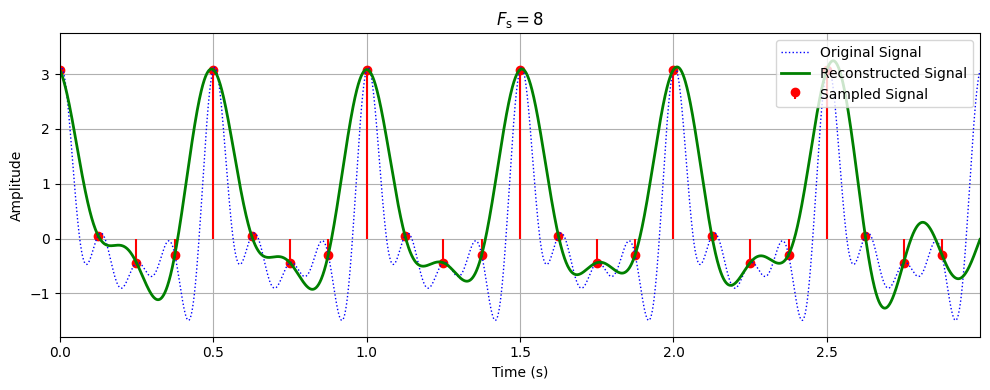

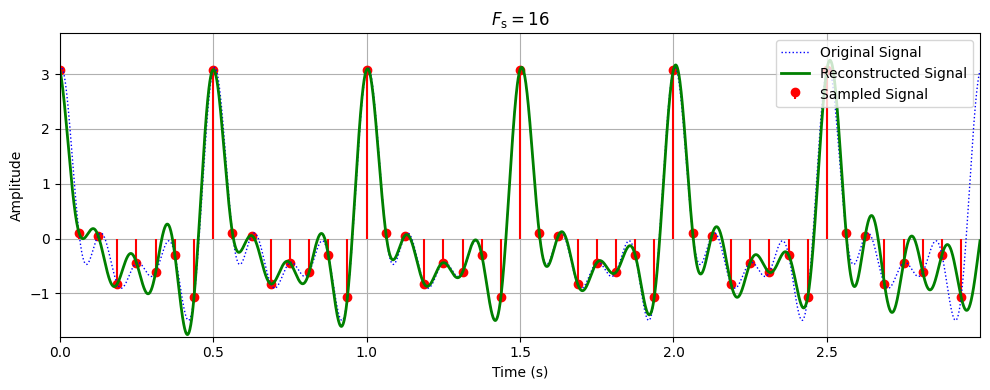

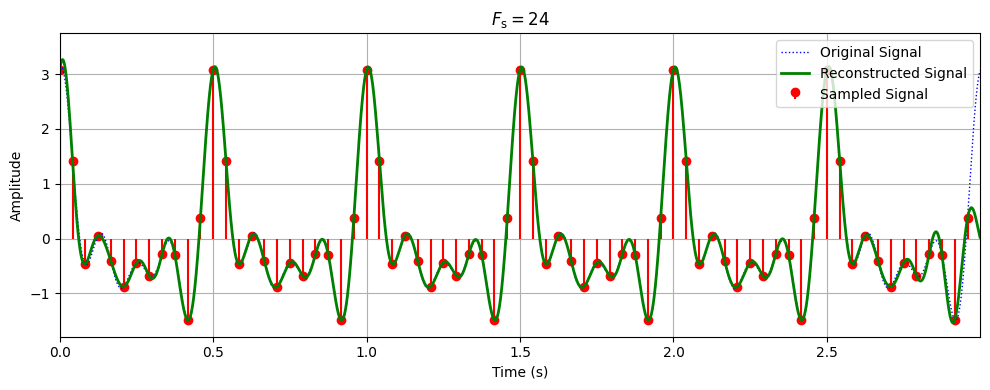

In [8]:
# Define sinc function (Note: Be careful at t=0)
def sinc(x):
  """
  Write your code here
  """
  signal_sinc = np.zeros_like(x, dtype=float)

  for i in range(len(x)):
      if x[i] == 0:
          signal_sinc[i] = 1.0
      else:
          signal_sinc[i] = np.sin(np.pi * x[i]) / (np.pi * x[i])
  return signal_sinc

# Define reconstruction filter defined in time domain (use sinc function)
# Input: Sampled signal, Time dimension of sampled signal, Time dimension of reconstructed signal
# Output: Reconstructed signal
def reconstruction_time(x, t, t_sinc):
    """
    Write your code here
    """
    Fs = 1 / (t[1] - t[0])  # 샘플 간 간격으로 Fs 계산
    signal_recon = np.zeros_like(t_sinc)

    for n in range(len(t)):
        signal_recon += x[n] * sinc(Fs * (t_sinc - t[n]))

    return signal_recon

x2_recon = reconstruction_time(x2, t2, t1)
x3_recon = reconstruction_time(x3, t3, t1)
x4_recon = reconstruction_time(x4, t4, t1)

plt.figure(figsize=(10, 4))
plt.stem(t2, x2, linefmt='r', markerfmt='ro', basefmt='None', label='Sampled Signal')
plt.plot(t1, x1, 'b', linewidth=1, linestyle='dotted', label='Original Signal')
plt.plot(t1, x2_recon, 'g', linewidth=2, label='Reconstructed Signal')
plt.xlim([0, t1[-1]])
plt.ylim([x1.min()*1.2, x1.max()*1.2])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(r'$F_\mathrm{s} = %.0f$' % Fs_2)
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

plt.figure(figsize=(10, 4))
plt.stem(t3, x3, linefmt='r', markerfmt='ro', basefmt='None', label='Sampled Signal')
plt.plot(t1, x1, 'b', linewidth=1, linestyle='dotted', label='Original Signal')
plt.plot(t1, x3_recon, 'g', linewidth=2, label='Reconstructed Signal')
plt.xlim([0, t1[-1]])
plt.ylim([x1.min()*1.2, x1.max()*1.2])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(r'$F_\mathrm{s} = %.0f$' % Fs_3)
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

plt.figure(figsize=(10, 4))
plt.stem(t4, x4, linefmt='r', markerfmt='ro', basefmt='None', label='Sampled Signal')
plt.plot(t1, x1, 'b', linewidth=1, linestyle='dotted', label='Original Signal')
plt.plot(t1, x4_recon, 'g', linewidth=2, label='Reconstructed Signal')
plt.xlim([0, t1[-1]])
plt.ylim([x1.min()*1.2, x1.max()*1.2])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(r'$F_\mathrm{s} = %.0f$' % Fs_4)
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()